## Essay 

### Importing libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import EditedNearestNeighbours 
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import OneSidedSelection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,precision_score
from sklearn.metrics import confusion_matrix
from google.colab import files
import io

### Loading data

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1lFvYGK-YeajG2oBQpX7gRljXJ86STZuJ' 

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1lFvYGK-YeajG2oBQpX7gRljXJ86STZuJ


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data = pd.read_csv('Filename.csv')

In [0]:
## Checking the first five instances of the data

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
### checking the shape of the data

data.shape

(284807, 31)

In [0]:
## checking the summary of our data

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.400941e-16,-1.373150e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.548484e-16,1.056807e-16,-2.406206e-15,...,1.662549e-16,-3.560610e-16,2.608586e-16,4.474413e-15,5.340915e-16,1.686512e-15,-3.684602e-16,-1.193648e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### checking  the names of the columns we have in our data

In [0]:
## checking  the names of the columns we have in our data

data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### checking any missing values

In [0]:
data.isnull().sum().values.any()


False

### checking whether the data is balanced 

In [0]:
Data=data[['Amount','Class']].groupby('Class').count()
Data

,Amount
Class,
0,284315
1,492


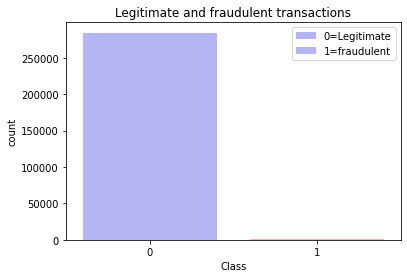

In [0]:
## Ploting the observations of the two classes

sns.countplot(x='Class',data=data,label='0=Legitimate',palette="bwr")
sns.countplot(x='Class',data=data,label='1=fraudulent',palette="bwr")
plt.title('Legitimate and fraudulent transactions')
plt.legend()
plt.show()


### Filtering the relevant features using a correlation matrix

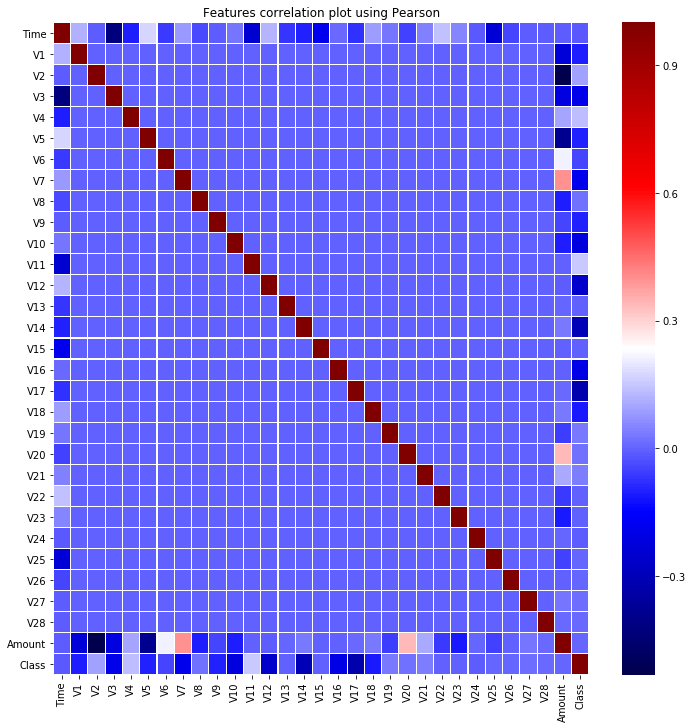

In [0]:

plt.figure(figsize = (12,12))
plt.title('Features correlation plot using Pearson')
corr = data.corr()## generating the correlation matrix
##sns.heatmap(corr)-generating the correlation heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="seismic")
plt.show()

From the correlation matrix we notice no correlation between the features V1-V28.

The variable Amount has a negative correlation with variables V2 and V5 and a positive correlation with the variables V7 and V20.

The variable time has a negative correlation with the vaarable V3.

### Standardizing the data 

In [0]:
## Standardizing the amount column 
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1)) 
  
# drop Time and Amount columns as they are not relevant for prediction purpose  
data = data.drop(['Time','Amount'], axis = 1) 
  

### Assigning x and y variables

In [0]:
##assigning x and y
##droping the predicted column

y=data.Class
x = data.drop('Class',axis=1)


In [0]:
## Checking the columns in the dataset

data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'normAmount'],
      dtype='object')

### Splitting the data into train and test

In [0]:
## Splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42) 
  
## The shape of our train and test data 
print("Number of transactions in the X_train : ", x_train.shape) 
print("Number of transactions in the y_train : ", y_train.shape) 
print("Number of transactions in the X_test : ", x_test.shape) 
print("Number of transactions in the y_test : ", y_test.shape) 

Number of transactions in the X_train :  (199364, 29)
Number of transactions in the y_train :  (199364,)
Number of transactions in the X_test :  (85443, 29)
Number of transactions in the y_test :  (85443,)


In [0]:
## checking the number of columns after dropping our predicted column

x.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normAmount'],
      dtype='object')

In [0]:
## Evaluation metrics

##  Different classifiers used to create a model

## Random Forest

**Random Forest**

**Advantages**

- Does not suffer from overfiting because it takes the average of all the predictions, which cancels out the biases.

**Disadvantages**

- It is time-consuming because it has multiple decision trees and when making any prediction all the trees in the forest has to make prediction for the same input and then a vote is made and the prediction with the highest votes is taken as the final prediction.  


### Fitting a Random Forest Model

## Under sampling using Near miss

In [0]:
## shape of the two classes before performing undersampling
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss(version=3) 
  
x_train_miss, y_train_miss = nr.fit_sample(x_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(x_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
 
  ## Shape after performing the undersampling 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 


Before Undersampling, counts of label '1': 356
Before Undersampling, counts of label '0': 199008 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Undersampling, the shape of train_X: (656, 29)
After Undersampling, the shape of train_y: (656,) 

After Undersampling, counts of label '1': 356
After Undersampling, counts of label '0': 300


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:194: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and al

## Random forest

### Manual Hyperparameter tuning - RF -Nearmiss

In [0]:
## n-estimator is the number of trees 

nearmiss = RandomForestClassifier(n_estimators=400,max_features='sqrt').fit(x_train_miss, y_train_miss.ravel())

nearmiss_pred = nearmiss.predict(x_test) ## the predicted 



### Evaluation metrics on Random Forest and Near miss

In [0]:
print(classification_report(y_test, nearmiss_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.34      0.86      0.49       136

    accuracy                           1.00     85443
   macro avg       0.67      0.93      0.74     85443
weighted avg       1.00      1.00      1.00     85443



## Confusion matrix for Random Forest and NearMiss

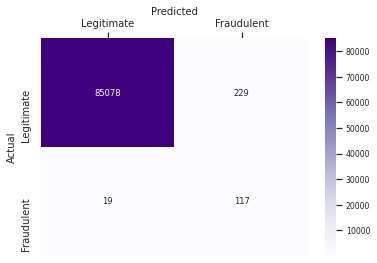

In [0]:
# Plot confusion matrix 
ax= plt.subplot()
cf_matrix=pd.DataFrame(confusion_matrix(y_test, nearmiss_pred ))
sns.heatmap(cf_matrix, annot=True, ax = ax, fmt = 'g',cmap="Purples"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
plt.show()


## Naive Bayes -Nearmiss

In [0]:
#Create a Gaussian Classifier
gaus_naive_mod = GaussianNB()

# Train the model using the training sets
gaus_naive_mod.fit(x_train_miss, y_train_miss.ravel())

#Predict the response for test dataset
Nby_pred = gaus_naive_mod.predict(x_test)


## Evaluation metrics on Naive Bayes and NearMiss

In [0]:
print(classification_report(y_test, Nby_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.12      0.57      0.20       136

    accuracy                           0.99     85443
   macro avg       0.56      0.78      0.60     85443
weighted avg       1.00      0.99      1.00     85443



## Confusion matrix for Naive Bayes and NearMiss

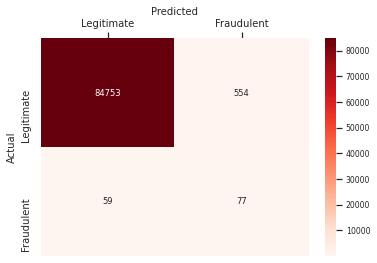

In [0]:
# Plot confusion matrix 
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, Nby_pred))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
plt.show()





## K-Nearest Neighbor (K-NN)

### Manual Hyperparameter tuning on K-NN and NearMiss

In [0]:
classifier = KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean') ##n-neighbor is the number of nearest neighbor and euclidean is the distance metric used
classifier.fit(x_train_miss, y_train_miss.ravel())
Knn_Pred=classifier.predict(x_test) ## the predicted 

### Evaluation metrics on K-NN and NearMiss

In [0]:
## The precision,recall and f1-score

print(classification_report(y_test, Knn_Pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.45      0.81      0.58       136

    accuracy                           1.00     85443
   macro avg       0.72      0.90      0.79     85443
weighted avg       1.00      1.00      1.00     85443



## Confusion matrix of K-NN and NearMiss

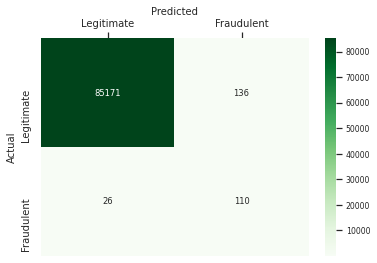

In [0]:
# Plot confusion matrix 
ax= plt.subplot()
Cf_matrix=pd.DataFrame(confusion_matrix(y_test, Knn_Pred))
sns.heatmap(Cf_matrix, annot=True, ax = ax, fmt = 'g',cmap="Greens"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
plt.show()



## SVM -Nearmiss

In [0]:
svclassifier = SVC(kernel='linear',C=0.001) ## Kernel tfunction is the linear and the C is the cost function 
svclassifier.fit(x_train_miss, y_train_miss)
SVc_Pred=svclassifier.predict(x_test)

## Evaluation matrix for SVM and NearMiss

In [0]:
# print classification report 
print(classification_report(y_test, SVc_Pred )) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.80      0.82      0.81       136

    accuracy                           1.00     85443
   macro avg       0.90      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443



## Confusion matrix for SVM and NearMiss

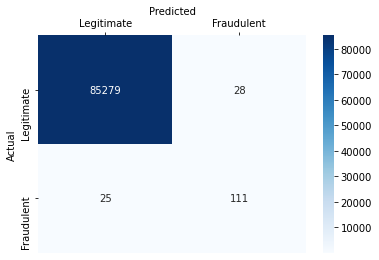

In [0]:
# Plot confusion matrix 
ax= plt.subplot()
Conf2_matrix=pd.DataFrame(confusion_matrix(y_test, SVc_Pred))
sns.heatmap(Conf2_matrix, annot=True, ax = ax, fmt = 'g',cmap="Blues"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
plt.show()





## Resampling using Oversampling(SMOTE) followed by under sampling(Tomek links)

In [0]:
smt = SMOTETomek(random_state=2)
x_train_smt, y_train_smt = smt.fit_sample(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
## Checking the shape of the x-train

print("The shape is:",x_train_smt.shape)

The shape is: (398016, 29)


In [0]:
## Checking the shape of the y-train

y_train_smt.shape

(398016,)

## KNN

### Manual Hyperparameter Tuning -KNN- Smote+tomeklink

In [0]:
classifier = KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean') ##n-neighbor is the number of nearest neighbor and euclidean is the distance metric used
classifier.fit(x_train_smt, y_train_smt.ravel())
Knn_pred=classifier.predict(x_test)

### Evaluation Metrics on K-NN and smote+tomek link

In [0]:
## The precision,recall and f1-score

print(classification_report(y_test, Knn_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.45      0.90      0.60       136

    accuracy                           1.00     85443
   macro avg       0.72      0.95      0.80     85443
weighted avg       1.00      1.00      1.00     85443



## Confusion matrix on K-NN and SMOTE and Tomek Links

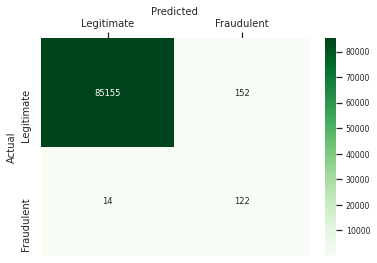

In [0]:
# Plot confusion matrix 
ax= plt.subplot()
Cf1_matrix=pd.DataFrame(confusion_matrix(y_test, Knn_pred))
sns.heatmap(Cf1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Greens"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
plt.show()



## Random Forest

### Manual Hyperparameter Tuning -Rf- Smote + Tomeklink

In [0]:
smotek = RandomForestClassifier(n_estimators=400,max_features='sqrt').fit(x_train_smt, y_train_smt.ravel()) ## n-estimator is the number of trees 


smotek_pred = smotek.predict(x_test) ## The predicted


### Eevaluation metrics on smote and Tomek link and Random forest

In [0]:
## The precision,recall and f1-score

print(classification_report(y_test, smotek_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.87      0.86       136

    accuracy                           1.00     85443
   macro avg       0.93      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



## Confusion matrix on random forest an SMOTE and Tomek Links

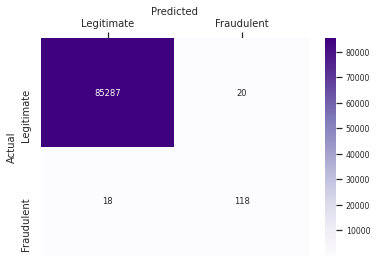

In [0]:
# Plot confusion matrix 
ax= plt.subplot()
cf1_matrix=pd.DataFrame(confusion_matrix(y_test, smotek_pred))
sns.heatmap(cf1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Purples"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
plt.show()




## Naive Bayes -Smote + tomek links

In [0]:
#Create a Gaussian Classifier
gaus_naive_mod = GaussianNB()

# Train the model using the training sets
gaus_naive_mod.fit(x_train_smt, y_train_smt.ravel())

#Predict the response for test dataset
Nnby_pred = gaus_naive_mod.predict(x_test)


## Evaluation metrics on Naive Bayes and SMOTE and Tomek Links

In [0]:
## The precision,recall and f1-score

print(classification_report(y_test, Nnby_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.88      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



## Confusion matrix of Naive Bayes and SMOTE and Tomek Links

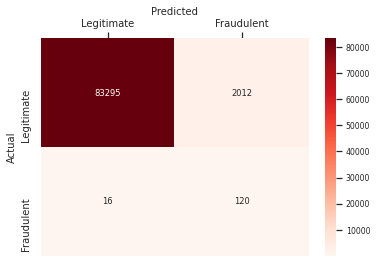

In [0]:
# Plot confusion matrix 
ax= plt.subplot()
Cf3_matrix=pd.DataFrame(confusion_matrix(y_test, Nnby_pred))
sns.heatmap(Cf3_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
plt.show()




## SVM -SMOTE+Tomek links removals

In [0]:
svclassifier = SVC(kernel='linear',C=0.01) ## Kernel tfunction is the linear and the C is the cost function 
svclassifier.fit(x_train_smt, y_train_smt)
SVC_pred=svclassifier.predict(x_test)

## Evaluation Metrics on SVM and SMOTE and Tomek Links

In [0]:
# print classification report 
print(classification_report(y_test, SVC_pred )) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443



## Confusion matrix of SVM and SMOTE and Tomek Links Removal

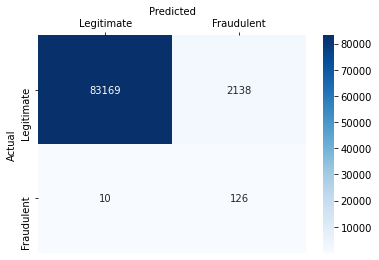

In [0]:
# Plot confusion matrix 
ax= plt.subplot()
Conf2_matrix=pd.DataFrame(confusion_matrix(y_test, SVC_pred))
sns.heatmap(Conf2_matrix, annot=True, ax = ax, fmt = 'g',cmap="Blues"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
plt.show()



## Resampling using Undersampling(ENN rule) followed by undersampling(CNN rule)

## Edited Nearest Neighbor and Condensed Nearest Neighbor

In [0]:
Ncr=NeighbourhoodCleaningRule()
x_train_ncr, y_train_ncr= Ncr.fit_resample(x_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

## Random Forest and ENN and CNN

### Manual Hyperparameter tuning - RF -ENN+CNN

In [0]:
ecnn = RandomForestClassifier(n_estimators=400,max_features='sqrt').fit(x_train_ncr, y_train_ncr.ravel())

ecnn_pred = ecnn.predict(x_test)



### Evaluation metrics on Random Forest - ENN+CNN

In [0]:
# print classification report 
print(classification_report(y_test, ecnn_pred)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.84      0.84       136

    accuracy                           1.00     85443
   macro avg       0.92      0.92      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## Confusion matrics of Random Forest and ENN + CNN

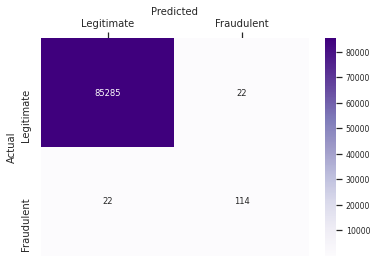

In [0]:
# Plot confusion matrix 
ax= plt.subplot()
cf2_matrix=pd.DataFrame(confusion_matrix(y_test, ecnn_pred))
sns.heatmap(cf2_matrix, annot=True, ax = ax, fmt = 'g',cmap="Purples"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
plt.show()



## Naive bayes- ENN+CNN

In [0]:
#Create a Gaussian Classifier
gaus_naive_mod = GaussianNB()

# Train the model using the training sets
gaus_naive_mod.fit(x_train_ncr, y_train_ncr.ravel())

#Predict the response for test dataset
NBY_pred = gaus_naive_mod.predict(x_test)


## Evaluation metrics on Naive Bayes and ENN +CNN

In [0]:
# print classification report 
print(classification_report(y_test, NBY_pred)) 


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



## Confusion matrixx on Naive Bayes and ENN + CNN

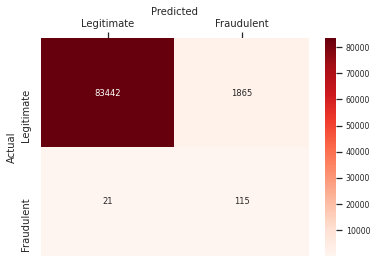

In [0]:
# Plot confusion matrix 
ax= plt.subplot()
cF2_matrix=pd.DataFrame(confusion_matrix(y_test, NBY_pred))
sns.heatmap(cF2_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
plt.show()




## K-NN and ENN + CNN

### Manual Hyperparameter tuning - KNN -EnN+cNN

In [0]:
classifier = KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean') ##n-neighbor is the number of nearest neighbor and euclidean is the distance metric used
classifier.fit(x_train_ncr, y_train_ncr.ravel())
KNN_pred=classifier.predict(x_test)

### Evaluation metrics on K-NN- ENN+CNN

In [0]:
# print classification report 
print(classification_report(y_test, KNN_pred)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.82      0.83       136

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443



## Confusion matrix on K-NN and ENN + CNN

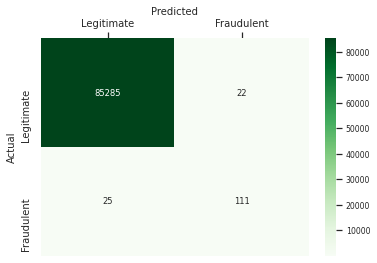

In [0]:
# Plot confusion matrix 
ax= plt.subplot()
Cf3_matrix=pd.DataFrame(confusion_matrix(y_test, KNN_pred))
sns.heatmap(Cf3_matrix, annot=True, ax = ax, fmt = 'g',cmap="Greens"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
plt.show()




## SVM- ENN+CNN

In [0]:
svclassifier = SVC(kernel='linear',C=0.01) ## Kernel tfunction is the linear and the C is the cost function 
svclassifier.fit(x_train_ncr, y_train_ncr)
Svc_pred=svclassifier.predict(x_test)

## Evaluation metrics on SVM and ENN + CNN

In [0]:
print(classification_report(y_test, Svc_pred)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.83      0.81       136

    accuracy                           1.00     85443
   macro avg       0.89      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443



## Confusion matrix on SVM and ENN + CNN

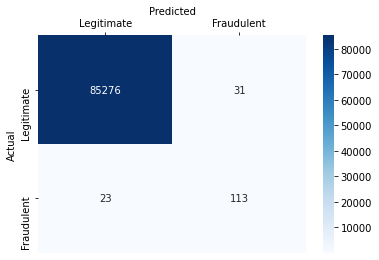

In [0]:
# Plot confusion matrix 
ax= plt.subplot()
Conf3_matrix=pd.DataFrame(confusion_matrix(y_test, Svc_pred))
sns.heatmap(Conf3_matrix, annot=True, ax = ax, fmt = 'g',cmap="Blues"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate', 'Fraudulent'], fontsize = 10)
plt.show()


